FOLLOW THESE STEPS TO RUN THIS WORKBOOK


1. Run all cells by choosing the commands as shown in the picture that can be found at the top of this workbook in the menu bar:
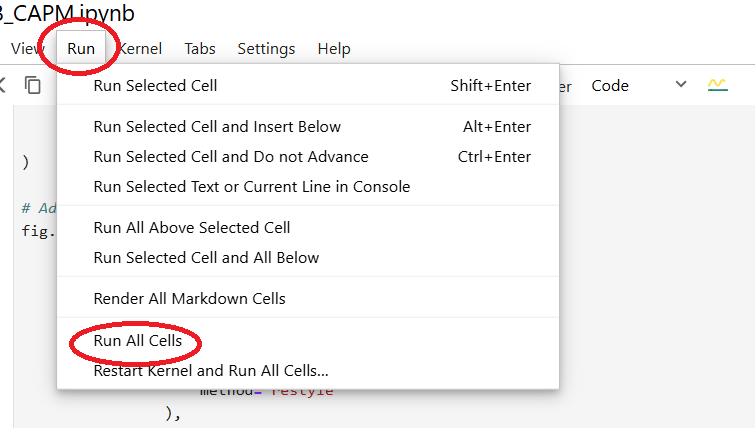

3.  Next, collapse all code by choosing the commands as shown in the picture that can be found at the top of this workbook in the menu bar:
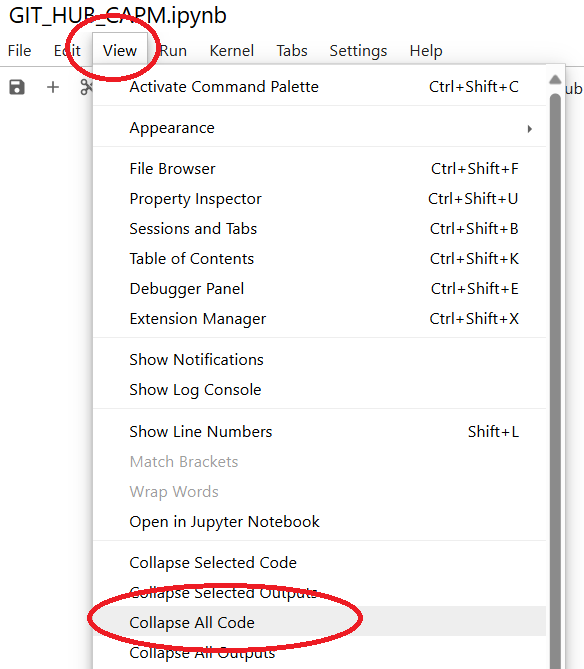

The following python code for the Monte Carlo method was taken from google gemini October 20, 2025 at 10:20 PM. 
The comments were based on research on google gemini on October 20, 2025 at 10 PM to October 21, 2025 at 1:30 AM.

The Monte Carlo method assumes stocks follow a random walk theory.  The first element of the model is called the "Drift" which is the historical return.  Next there is the "Random Shock" element of the model which represents market volatility driven by random sampling.  The calculation works as follows; Drift= (log-return).  Volatility is the standard deviation of the returns.  The fundamentals of the model are to use random samples from a normal distribution to determine the shocks that happen within the market.  The model will run thousands of trials to produce a probability of distribution.

This specific model is based on Leverage shares 3x Facebook (FB3.L) using a GraniteShares 3x Facebook ETP Securities annual return of 107.84%.  GraniteShares was used as a general proxy for FB3.L.  It is not identical but is a reasonable comparison.  The FB3.L is designed to be three times the daily change of the already volatile Meta Platforms stock. 

The stock is designed for an agressive trade.  If Facebook moved by 3% in one day, than FB3.L would move by 9%.  It would be best to not hold the stock beyond one day. The advantage of such a stock is that it avoids the complexitites of a margin account. The elements used for this stock were the closing price on October 20, 2025 and a target price of $10.82.  The model concludes that there is a 9.97% chance of the stock exceeding $10.82 in one trading day. If it does reach the target price of $10.82 than the days return on that trade will be approximately 8.9%.

--- Monte Carlo Simulation (10000 paths over 0.003968253968253968 year) ---
Initial Price (S0): $9.94
Annual Return (mu): 5.5%
Annual Volatility (sigma): 107.8%

--- Simulation Summary ---
Expected (Mean) Final Price: $9.95
Median Final Price: $9.93
Standard Deviation: $0.67
95% Confidence Interval: [$8.68, $11.34]


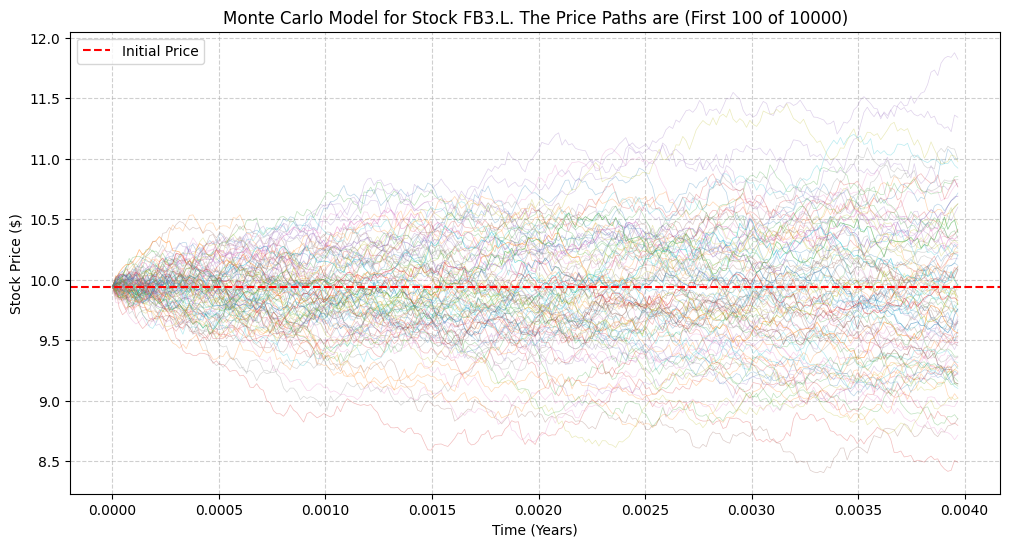

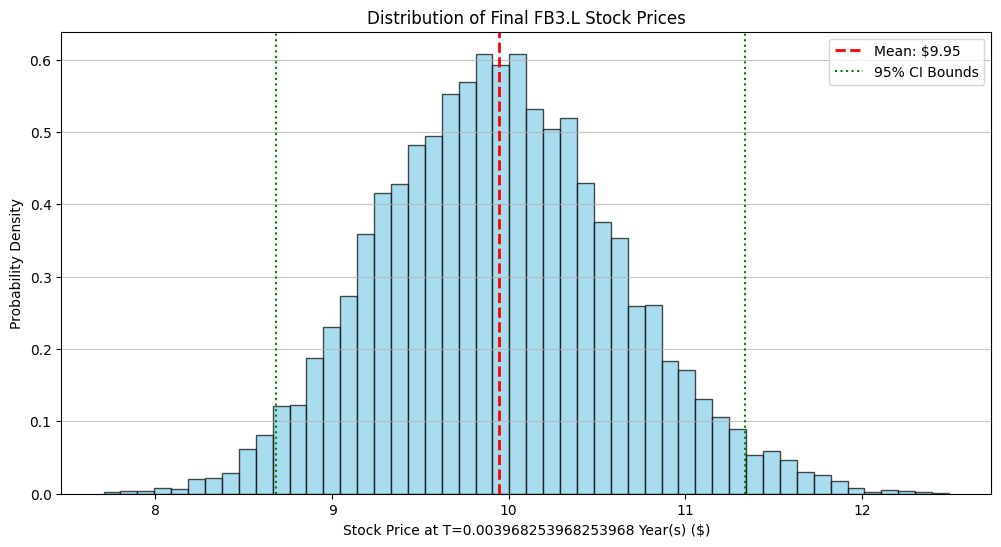


Probability of the stock exceeding a price within the next day of $10.82: 9.97%


In [12]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_price_simulation(S0, mu, sigma, T, N_simulations, N_steps):
    """
    Estimates the future price of a stock using Monte Carlo simulation based on
    Geometric Brownian Motion (GBM).

    Args:
        S0 (float): Current stock price.
        mu (float): Expected annual return (drift).
        sigma (float): Annual volatility.
        T (float): Total time in years (e.g., 1.0 for one year).
        N_simulations (int): Number of independent price paths to simulate.
        N_steps (int): Number of time steps in the simulation (affects granularity).

    Returns:
        tuple: (final_prices, price_paths)
            - final_prices (np.array): Array of final prices after time T.
            - price_paths (np.array): 2D array of all simulated price paths.
    """

    # Calculate the time increment for each step
    dt = T / N_steps

    # Calculate the drift component of the GBM equation
    # (mu - 0.5 * sigma^2) * dt
    drift = (mu - 0.5 * sigma**2) * dt

    # Calculate the diffusion component (volatility term)
    # sigma * sqrt(dt)
    volatility_term = sigma * np.sqrt(dt)

    # Array to hold the final price for each simulation
    final_prices = np.zeros(N_simulations)

    # Array to hold all price paths (N_simulations rows, N_steps+1 columns)
    price_paths = np.zeros((N_simulations, N_steps + 1))

    # Initialize all paths with the starting price S0
    price_paths[:, 0] = S0

    # Main Monte Carlo loop
    for i in range(N_simulations):
        # Array to store the prices for the current path
        prices = np.zeros(N_steps + 1)
        prices[0] = S0

        # Generate N_steps standard normal random variables (Z) for the path
        Z = np.random.standard_normal(N_steps)

        # Calculate price changes step-by-step
        for t in range(1, N_steps + 1):
            # GBM formula step: S_t = S_{t-1} * exp(drift + volatility_term * Z)
            prices[t] = prices[t-1] * np.exp(drift + volatility_term * Z[t-1])

        # Store the final price and the full path
        final_prices[i] = prices[-1]
        price_paths[i, :] = prices

    return final_prices, price_paths

# --- Example Usage ---
if __name__ == '__main__':
    # Define stock and simulation parameters
    S0 = 9.94          # Current stock price
    mu = 0.0554           # Expected annual return (5.54%)
    sigma = 1.0784        # Annual volatility (107.84%)
    T = 1.0/252             # Time horizon in years (1 year)
    N_simulations = 10000  # Number of simulated paths
    N_steps = 252       # Trading days in a year (daily steps)

    print(f"--- Monte Carlo Simulation ({N_simulations} paths over {T} year) ---")
    print(f"Initial Price (S0): ${S0:.2f}")
    print(f"Annual Return (mu): {mu*100:.1f}%")
    print(f"Annual Volatility (sigma): {sigma*100:.1f}%")

    # Run the simulation
    final_prices, price_paths = monte_carlo_price_simulation(S0, mu, sigma, T, N_simulations, N_steps)

    # --- Results Analysis ---
    mean_price = np.mean(final_prices)
    median_price = np.median(final_prices)
    std_dev = np.std(final_prices)

    # Find confidence interval (e.g., 95% confidence)
    confidence_interval = np.percentile(final_prices, [2.5, 97.5])

    print("\n--- Simulation Summary ---")
    print(f"Expected (Mean) Final Price: ${mean_price:.2f}")
    print(f"Median Final Price: ${median_price:.2f}")
    print(f"Standard Deviation: ${std_dev:.2f}")
    print(f"95% Confidence Interval: [${confidence_interval[0]:.2f}, ${confidence_interval[1]:.2f}]")

    # --- Plotting the Results ---

    # 1. Plot a few representative paths
    plt.figure(figsize=(12, 6))
    time_points = np.linspace(0, T, N_steps + 1)

    # Plot the first 100 paths for visualization clarity
    for i in range(min(100, N_simulations)):
        plt.plot(time_points, price_paths[i], lw=0.5, alpha=0.3)

    plt.plot(time_points, price_paths[:10].T, lw=0.5, alpha=0.3) # Plotting a subset
    plt.title(f'Monte Carlo Model for Stock FB3.L. The Price Paths are (First 100 of {N_simulations})')
    plt.xlabel('Time (Years)')
    plt.ylabel('Stock Price ($)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axhline(S0, color='red', linestyle='--', label='Initial Price')
    plt.legend()
    plt.show()

    # 2. Plot the distribution of final prices
    plt.figure(figsize=(12, 6))
    plt.hist(final_prices, bins=50, color='skyblue', edgecolor='black', alpha=0.7, density=True)

    # Add key statistics to the plot
    plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Mean: ${mean_price:.2f}')
    plt.axvline(confidence_interval[0], color='green', linestyle=':', linewidth=1.5, label='95% CI Bounds')
    plt.axvline(confidence_interval[1], color='green', linestyle=':', linewidth=1.5)

    plt.title('Distribution of Final FB3.L Stock Prices')
    plt.xlabel(f'Stock Price at T={T} Year(s) ($)')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # 3. Probability of exceeding a target price
    target_price = 10.82
    prob_exceed = np.mean(final_prices >= target_price)
    print(f"\nProbability of the stock exceeding a price within the next day of ${target_price:.2f}: {prob_exceed*100:.2f}%")